# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

np.random.seed(5)

%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [28]:
km=KMeans(n_clusters=3)
km.fit(X)
print(km.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [29]:
X[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

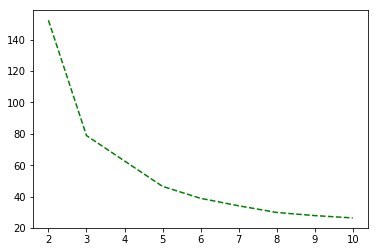

In [30]:
nb_clusters=[2,3,5,6,7,8,9,10]
inertias=[]
for n in nb_clusters:
    km=KMeans(n_clusters=n)
    km.fit(X)
    inertias.append(km.inertia_)
plt.plot(nb_clusters,inertias,linestyle='--',color='g')

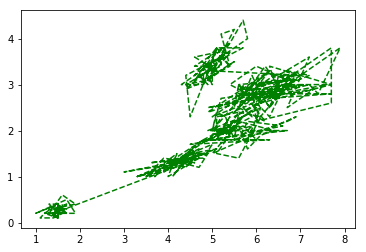

In [31]:
plt.plot(X[:,0],X[:,1],X[:,2],X[:,3],linestyle='--',color='g')

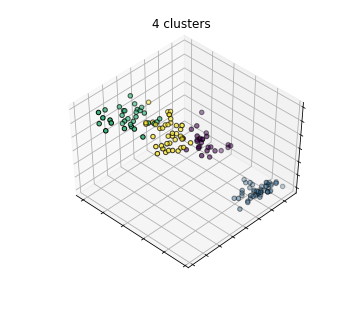

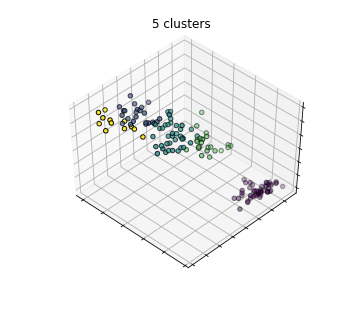

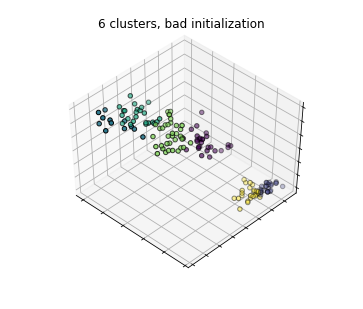

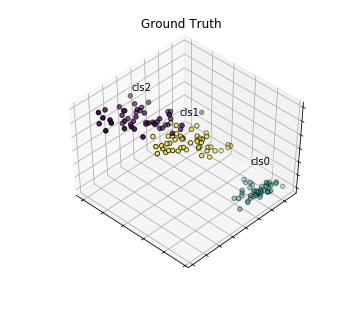

In [32]:
estimators = [('k_means_4', KMeans(n_clusters=4)),
              ('k_means_5', KMeans(n_clusters=5)),
              ('k_means_6', KMeans(n_clusters=6))]


fignum = 1
titles = ['4 clusters', '5 clusters', '6 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(5, 4))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(5, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

In [37]:
guess = np.array([[1,  2,  3, 4],
 [5,      3,      3,      0     ],
 [4,       3, 5, 3],
 [3,5,2, 1]])
km=KMeans(n_clusters=4,init=guess)
km.fit(X)
print(km.cluster_centers_)

[[7.08695652 3.12608696 6.01304348 2.14347826]
 [5.006      3.418      1.464      0.244     ]
 [5.58       2.63333333 3.98666667 1.23333333]
 [6.29361702 2.9        4.95106383 1.72978723]]


C:\Users\irvin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
